## Chapter 9 Getting Started with Machine Learning in Python
### Regression
+ Linear regression
	+ Predicting the length of a year on a planet
	+ Interpreting the linear regression equation
	+ Making predictions
+ Evaluating regression results
	+ Analyzing residuals
	+ Metrics
    
Регрессия - это техника моделирования силы и величины взаимосвязи между независимыми переменными (X, часто называют **регрессоры**) и зависимой переменной (y) 



#### Линейная регрессия
+ модуль `linear_model` библиотеки Scikit-learn

В простой линейной регрессии, мы **fit** (подгоняем, приближаем) наши данные линией по следующей формуле:
$$
y = \beta_0 + \beta_1x + \varepsilon
$$
где
+ $\varepsilon$ - ошибка, error term
+ $\beta$ - коэффициенты


Коэффициенты мы получаем при минимизации функции потерь - разница между observed values ($y$) и predicted values ($\hat y$)

Наша модель дает нам оценки этих коэффициентов, поэтому мы их записываем как $\hat {\beta}_i$

Множественная линейная регрессия:
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 +\dots+  \beta_nx_n  \varepsilon
$$

Scikit-learn использует:
+ OLS (МНК) метод для получения оценок коэффициентов

Коэффициенты можно получить:
+ аналитически (closed-form solution)
+ с помощью оптимизационных методов, например **gradient descent** (использует отрицательный градиент, где градиент направление наибольшего роста функции, вычисленный с помощью частных производных)


**Предположения линейной регрессии о данных**
+ ошибки - нормально распределены и гомоскедантичны
+ отсутствует мультиколлинеарность (высокая корреляция между регрессорами)


#### Прогнозирование продложительности года на разных планетах
+ используем датасет planets, чтобы прогнозировать продолжительность года.

##### Разбиение выборки, обучение модели

In [65]:
import pandas as pd
import numpy as np

file = 'data/planets.csv'
planets = pd.read_csv(file)
planets.head()

,mass,description,periastrontime,semimajoraxis,discoveryyear,list,eccentricity,period,discoverymethod,lastupdate,periastron,name
0,19.400,11 Com b is a brown dwarf-mass companion to th...,2452899.60,1.290,2008.0,Confirmed planets,0.231,326.03,RV,15/09/20,94.800,11 Com b
1,11.200,11 Ursae Minoris is a star located in the cons...,2452861.04,1.540,2009.0,Confirmed planets,0.080,516.22,RV,15/09/20,117.630,11 UMi b
2,4.800,14 Andromedae is an evolved star in the conste...,2452861.40,0.830,2008.0,Confirmed planets,0.000,185.84,RV,15/09/20,0.000,14 And b
3,4.975,The star 14 Herculis is only 59 light years aw...,NaN,2.864,2002.0,Confirmed planets,0.359,1766.00,RV,15/09/21,22.230,14 Her b
4,7.679,14 Her c is the second companion in the system...,NaN,9.037,2006.0,Controversial,0.184,9886.00,RV,15/09/21,189.076,14 Her c


In [66]:
planets.columns

Index(['mass', 'description', 'periastrontime', 'semimajoraxis',
       'discoveryyear', 'list', 'eccentricity', 'period', 'discoverymethod',
       'lastupdate', 'periastron', 'name'],
      dtype='object')

In [67]:
# изолируем столбцы, которые мы будем использовать для прогнозирования
data = planets[[ 'semimajoraxis','period', 'mass', 'eccentricity']].dropna()
data.head()

,semimajoraxis,period,mass,eccentricity
0,1.290,326.03,19.400,0.231
1,1.540,516.22,11.200,0.080
2,0.830,185.84,4.800,0.000
3,2.864,1766.00,4.975,0.359
4,9.037,9886.00,7.679,0.184


In [68]:
X = data[[ 'semimajoraxis', 'mass', 'eccentricity']]
y = data['period']
X.shape, y.shape

((1222, 3), (1222,))

In [69]:
# разделим выборку на обучающую и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((855, 3), (367, 3), (855,), (367,))

In [71]:
X_train.head()

,semimajoraxis,mass,eccentricity
3982,0.04990,0.276000,0.000
306,0.21300,0.008493,0.020
654,2.42000,2.290000,0.120
4090,0.04421,0.709000,0.038
630,0.49500,9.710000,0.708


In [72]:
# создадим и обучим модель
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)

##### Смотрим корреляцию признаков
+ если у нас более одного регрессора - аккуратно, отслеживаем мультиколлинеарность

В нашем случае нет высокой корреляции между признаками

In [73]:
# посмотрим на корреляцию регрессоров
X.corr()

,semimajoraxis,mass,eccentricity
semimajoraxis,1.000000,0.082346,0.137610
mass,0.082346,1.000000,0.221779
eccentricity,0.137610,0.221779,1.000000


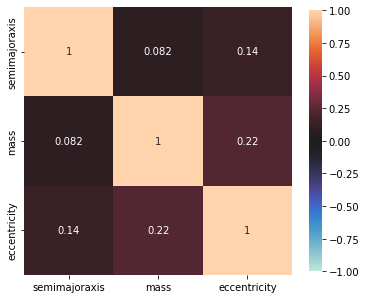

In [74]:
# изобразим корреляцию на графике
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
sns.heatmap(X.corr(), center=0, vmin=-1, vmax=1, square=True, annot=True, cbar_kws={'shrink': 0.8});

##### Получаем коэффициенты модели
Получаем такую модель:
period = -630 + 1908 х semimajoraxis - 91 х mass - 3254 x eccentricity

In [75]:
# получим intercept 
lm.intercept_

-630.7134935592405

In [76]:
# получим коэффициенты модели
[(col, coef) for col, coef in zip(X_train.columns, lm.coef_)]

[('semimajoraxis', 1908.7729057935683),
 ('mass', -91.01631524464221),
 ('eccentricity', -3254.6278099986944)]

##### Making predictions

In [77]:
preds = lm.predict(X_test)
preds[:5]

array([  -634.20924847,   -681.99391859, -25235.42548686,   -800.08424397,
         -663.32938698])

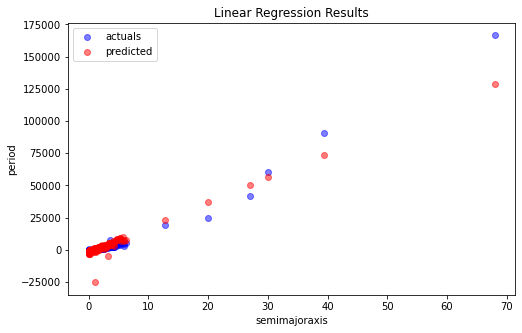

In [78]:
# нарисуем actual и predicted values
fig, axes = plt.subplots(1, 1, figsize=(8,5))

axes.plot(X_test['semimajoraxis'], y_test, 'ob',
         label = 'actuals', alpha=0.5)

axes.plot(X_test['semimajoraxis'], preds, 'or',
         label = 'predicted', alpha=0.5)

axes.set(xlabel='semimajoraxis', ylabel = 'period')
axes.legend()
axes.set_title('Linear Regression Results')
plt.show()

In [79]:
# корреляция фактических и прогнозных значений
np.corrcoef(y_test, preds)[0][1]

0.9640822893709363

###  Evaluating regression results
+ how much of the variance in the data our model is able to capture
+ how accurate the predictions are

Для этого мы:
+ анализируем остатки (centered around zero and homoskedastic)
+ считаем метрики: $R^2$, $Adjusted R^2$, explained variance, $MAE$, $RMSE$ 

#### Analyzing residuals
+ we should visualize our residuals (discrepancies between the actual values and the model's predictions)
+ остатки должны быть  centered around zero and homoskedastic (similar variance throughout).

Мы можем использовать 
+ kernel density estimate to assess whether the residuals are centered around zero
+ scatter plot to see if they are homoskedastic

Напишем функцию для отрисовки остатков


In [80]:
def plot_residuals(y_test, preds):
    """
    Отрисовка остатков для оценки регрессии
    
    Параметры:
        - y_test: The true values of y
        - preds: The predicted values of y
        
    Returns:
        Subplots of residual scatter plot and residual KDE
    """
    residuals = y_test - preds
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    axes[0].scatter(np.arange(residuals.shape[0]), residuals)
    axes[0].set(xlabel='Observation', ylabel='Residual')
    
    residuals.plot(kind='kde', ax=axes[1])
    axes[1].set_xlabel('Residual')
    
    plt.suptitle('Исследование остатков')
    plt.show()
    #return axes

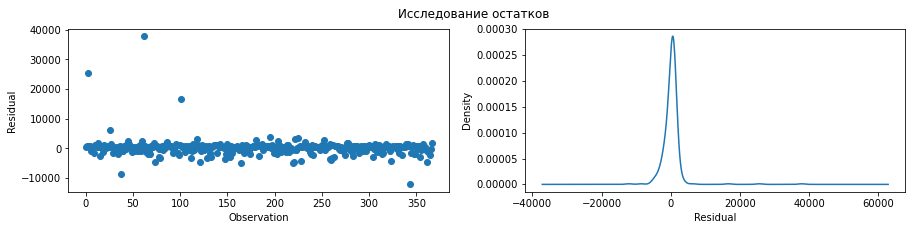

In [81]:
plot_residuals(y_test, preds)

**Tip**

Если мы увидим паттерны в отстатках:
+ можно попробовать применить полиномиальную регрессию
+ log transformations данных

####  Метрики

$R^2$ - coefficient of determination, который количественно определяет **долю дисперсии зависимой переменной**, которую мы можем предсказать на основе наших независимых переменных.

$$
R^2 = 1 = \frac{SS_{residual}}{SS_{total}} = 1 - \frac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \bar y_i)^2}
$$

Для расчета используем 
+ метод `score()` 
+ метод `r2_score()`

In [82]:
lm.score(X_test, y_test)

0.9198481803799846

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.9198481803799846

Проблема $R^2$:
+ если мы будем добавлять метрики и усложнять модель
+ $R^2$ будет расти

Поэтому используем $Adjusted R^2$, который увеличивается лишь в том случае, если новый дополнительный регрессор улучшает модель больше, чем просто случайно

$$
Adjusted R^2 = 1 - (1-R^2)\times \frac{n_{obs} -1}{n_{obs} - n_{regressors}-1}
$$

В scikit-learn нет такой метрики, поэтому напишем функцию:

In [84]:
def adjusted_r2(model, X, y):
    """
    Расчет adjusted R^2
    
    Параметры:
        - model: Estimator object with a `predict()` method
        - X: The values to use for prediction
        - y: The true values for scoring
        
    Returns:
        The adjusted R^2 score
    """
    r2 = r2_score(y, model.predict(X))
    n_obs, n_regressors = X.shape
    adj_r2 = 1 - (1-r2) * (n_obs - n_regressors) / (n_obs - n_regressors - 1)
    
    return adj_r2    

In [85]:
adjusted_r2(lm, X_test, y_test)

0.9196273764691857

**Explained variance score**
+ percentage of the variance that is explained by our model

$$
explained \ variance = 1 - \frac{var(residuals}{var(actuals} = 1 - \frac{var(y-\hat y)}{var(y)}
$$

In [86]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, preds)

0.9204137269049516

**Mean absolute error (MAE)**
+ tells us the average error our model made in either direction
+ Values range from 0 to ∞ (infinity), with smaller values being better

$$
MAE = \frac{\sum_i|y_i - \hat y_i|}{n}
$$

In [87]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

1359.9415009100032

**Root mean squared error (RMSE)**
$$
RMSE = \sqrt \frac{\sum_i(y_i - \hat y_i)^2}{n}
$$

In [88]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, preds))

3021.4999119766558

**median absolute error**
+ the median of the residuals
+ применять если у нас  few outliers in our residuals и we want a more accurate description of the bulk of the errors


In [89]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, preds)

771.8802517439957

### Линейная регрессия со стандартизированными регрессорами

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# обучаем scaler на тренировочном наборе
scaler.fit(X_train)

# трансформируем признаками
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
X_train.head()

,semimajoraxis,mass,eccentricity
3982,0.04990,0.276000,0.000
306,0.21300,0.008493,0.020
654,2.42000,2.290000,0.120
4090,0.04421,0.709000,0.038
630,0.49500,9.710000,0.708


In [105]:
y_train_scaled = (y_train - y_train.mean()) / y_train.std()
y_test_scaled = (y_test - y_train.mean()) / y_train.std()

In [103]:
y_train.mean(), y_train.std()

(1137.6875694915311, 7774.169290468146)

In [107]:
lm_scaled = LinearRegression().fit(X_train_scaled, y_train_scaled)
lm_scaled.intercept_, lm_scaled.coef_

(-1.1860321863548257e-16, array([ 0.94301567, -0.05950747, -0.07920595]))

In [108]:
preds_scaled = lm.predict(X_test_scaled)

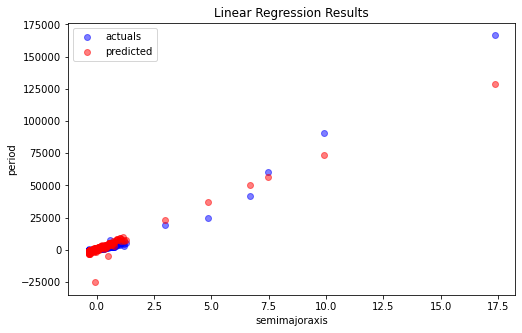

In [114]:
# нарисуем actual и predicted values
fig, axes = plt.subplots(1, 1, figsize=(8,5))

axes.plot(pd.DataFrame(X_test_scaled).loc[:,0], y_test, 'ob',
         label = 'actuals', alpha=0.5)

axes.plot(pd.DataFrame(X_test_scaled).loc[:,0], preds, 'or',
         label = 'predicted', alpha=0.5)

axes.set(xlabel='semimajoraxis', ylabel = 'period')
axes.legend()
axes.set_title('Linear Regression Results')
plt.show()

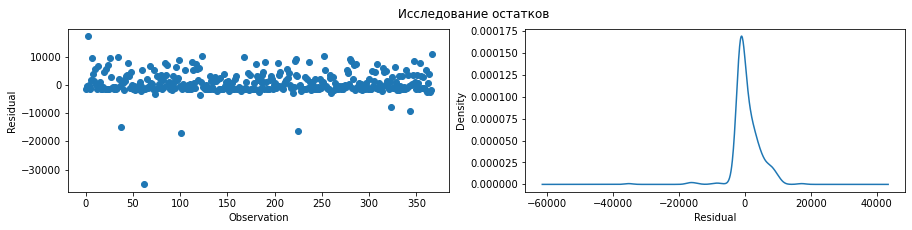

In [115]:
plot_residuals(y_test_scaled, preds_scaled)

In [120]:
mean_absolute_error(y_test_scaled, preds_scaled)

2563.2804782340386

In [118]:
lm_scaled.score(X_test_scaled, y_test_scaled)

0.919848180379985

In [121]:
!pip install pandoc 

  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33291 sha256=58dcb74a01dd6b173033483df1f0c5f38408ab4eb3064055cf86916cdf20485b
  Stored in directory: c:\users\a.g. shurakov\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
